# Robust Regression
### Used when OLS assumptions aren't met

In [25]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('../data/robust2.csv')
df.head()

,X,y
0,-0.359553,-19.955886
1,0.976639,21.339773
2,0.402342,11.556895
3,-0.813146,-16.342069
4,-0.887786,-35.700638


<Axes: xlabel='X', ylabel='y'>

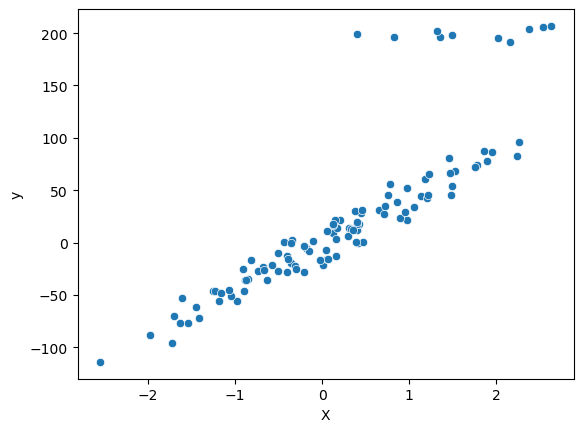

In [28]:
sns.scatterplot(x='X', y='y', data=df)

In [30]:
X = df['X']
X = sm.add_constant(X)
y = df['y']

OLS Regression Coefficients:
const     7.191377
X        56.091064
dtype: float64

Robust Regression Coefficients:
const     1.089777
X        46.138025
dtype: float64


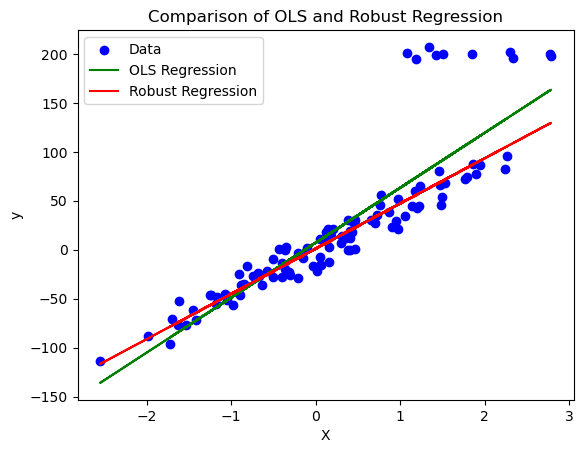

In [1]:
#Fit an OLS model
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()

In [38]:
#Fit an OLS model
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
ols_yhat = ols_results.predict(X)
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     303.4
Date:                Fri, 31 May 2024   Prob (F-statistic):           3.81e-33
Time:                        10:13:03   Log-Likelihood:                -551.18
No. Observations:                 110   AIC:                             1106.
Df Residuals:                     108   BIC:                             1112.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0296      3.557      2.258      0.026       0.980      15.080
X             55.6352      3.194     17.420      0.000      49.305      61.966
==============================================================================
Omnibus:                       71.967   Durbin-Watson:                   0.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.279
Skew:                           2.350   Prob(JB):                     5.12e-67
Kurtosis:                       9.671   Cond. No.                         1.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#Fit a robust OLS model
robust_model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
robust_results = robust_model.fit()
robust_yhat = robust_results.predict(X)
robust_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                  110
Model:                            RLM   Df Residuals:                      108
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 31 May 2024                                         
Time:                        10:13:05                                         
No. Iterations:                    27                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0940      1.492      0.733      0.463      -1.830       4.018
X             45.8332      1.340     34.213      0.000      43.208      48.459
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

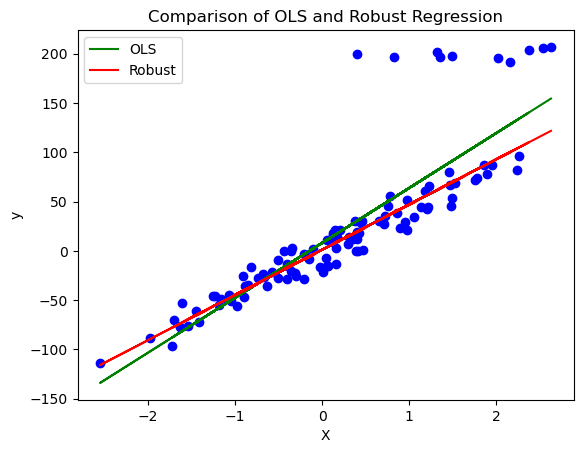

In [64]:
plt.scatter(df['X'], df['y'], color='blue')
plt.plot(df['X'], ols_yhat, color='green', label='OLS')
plt.plot(df['X'], robust_yhat, color='red', label='Robust')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of OLS and Robust Regression')
plt.legend()
plt.show()